# El siguiente notebook contiene el script utilizado para obtener el datase

### Librería pandas

In [2]:
import pandas as pd

### Función para procesar el archivo csv original

In [3]:
def process_csv(file_path):
    try:
        # Leer el archivo CSV
        df = pd.read_csv(file_path)

        # Validar que las columnas requeridas existan
        required_columns = {'patient_id', 'image view', 'image file path'}
        if not required_columns.issubset(df.columns):
            raise ValueError(f"El archivo CSV debe contener las columnas: {', '.join(required_columns)}")

        # Filtrar el DataFrame por la columna 'image view' con valor 'MLO'
        filtered_df = df[df['image view'] == 'MLO']

        return filtered_df

    except FileNotFoundError:
        print(f"El archivo '{file_path}' no se encontró.")
    except ValueError as e:
        print(e)
    except Exception as e:
        print(f"Ocurrió un error inesperado: {e}")

In [4]:
# Ejecución del código
# Ruta al archivo CSV
csv_file_path = '..\\..\\DataBase\\manifest-1734800255136\\mass_case_description_train_set.csv'

# Llamar a la función y obtener el DataFrame filtrado
filtered_mlo_dataframe = process_csv(csv_file_path)

if filtered_mlo_dataframe is not None:
    print("DataFrame filtrado por 'image view' con valor 'MLO':")
    print(filtered_mlo_dataframe.iloc[1])

DataFrame filtrado por 'image view' con valor 'MLO':
patient_id                                                           P_00004
breast_density                                                             3
left or right breast                                                    LEFT
image view                                                               MLO
abnormality id                                                             1
abnormality type                                                        mass
mass shape                                          ARCHITECTURAL_DISTORTION
mass margins                                                     ILL_DEFINED
assessment                                                                 4
pathology                                                             BENIGN
subtlety                                                                   3
image file path            Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...
cropped image file path

url: '..\\..\\DataBase\\manifest-1734800255136\\CBIS-DDSM\\Mass-Training_P_00004_LEFT_MLO\\1.3.6.1.4.1.9590.100.1.2.272600286511817402806912403581910920939\\1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162\\1-1.dcm'
url_mask: '..\\..\\DataBase\\manifest-1734800255136\\CBIS-DDSM\\Mass-Training_P_00004_LEFT_MLO_1\\1.3.6.1.4.1.9590.100.1.2.342549219112801262604988012930063078769\\1.3.6.1.4.1.9590.100.1.2.115134232113001553100559896703407510515\\1-1.dcm'
True
True
<class 'numpy.ndarray'>


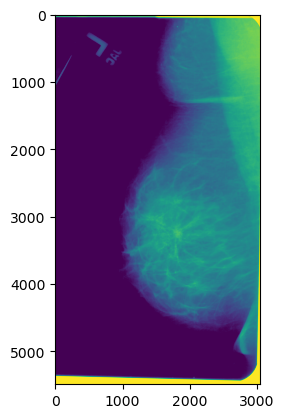

<class 'numpy.ndarray'>


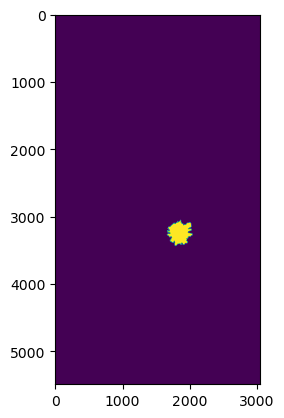

In [5]:
#Script del Profesor para lectura de la imágen

import matplotlib.pyplot as plt
import pydicom
import os

file_path_original_csv = filtered_mlo_dataframe.iloc[1]['image file path'].replace('/', '\\').replace('000000.dcm', '1-1.dcm').replace('\n', '')
file_path_mask_csv = filtered_mlo_dataframe.iloc[1]['ROI mask file path'].replace('/', '\\').replace('000001.dcm', '1-1.dcm').replace('\n', '')
#url = "/mnt/Datos/Cancer/CBIS-DDSM/Mass-Training_P_02079_RIGHT_MLO/07-20-2016-DDSM-NA-29838/1.000000-full mammogram images-90663/1-1.dcm"
url = '..\\..\\DataBase\\manifest-1734800255136\\CBIS-DDSM\\' + file_path_original_csv
url_mask = '..\\..\\DataBase\\manifest-1734800255136\\CBIS-DDSM\\' + file_path_mask_csv


print('url: ' + repr(url))
print('url_mask: ' + repr(url_mask))
print(os.path.exists(url))
print(os.path.exists(url_mask))

dicom_file = pydicom.dcmread(url)
image = dicom_file.pixel_array
print(type(image))
# Mostrar la imagen
plt.imshow(image)
plt.show()

dicom_file = pydicom.dcmread(url_mask)
image = dicom_file.pixel_array
print(type(image))
# Mostrar la imagen
plt.imshow(image)
plt.show()

Mass-Training_P_00001_LEFT_MLO\1.3.6.1.4.1.9590.100.1.2.319478999311971442426185353560182990988\1.3.6.1.4.1.9590.100.1.2.359308329312397897125630708681441180834\000000.dcm

In [27]:
# La ruta debe cambiar según la carpeta del dataset '..\\..\\DataBase\\manifest-1734800255136\\CBIS-DDSM\\'
#Get numpy array from image
def getNumpyFromDicom(dicom_path):
    file_path_name = dicom_path.replace('000001.dcm', '1-1.dcm').replace('000000.dcm', '1-1.dcm')
    file_path_name = file_path_name.replace('/', '\\').replace('\n', '')
    url = '..\\..\\DataBase\\manifest-1734800255136\\CBIS-DDSM\\' + file_path_name
    dicom_file = pydicom.dcmread(url)
    image = dicom_file.pixel_array
    return image

In [ ]:
#Get dictionari example from data frame
#Columns: patient_id, left or right breast, mass shape, pathology, image file path, ROI mask file path
import pickle

list_dicts_dataset = []

for index, row in filtered_mlo_dataframe.iterrows():
    row_dict = {
        'patient_id': row['patient_id'],
        'left_or_right_breast': row['left or right breast'],
        'mass_shape': row['mass shape'],
        'pathology': row['pathology'],
        'image_file_numpy': getNumpyFromDicom(row['image file path']),
        'roi_mask_file_numpy': getNumpyFromDicom(row['ROI mask file path'])
    }
    list_dicts_dataset.append(row_dict)

print(list_dicts_dataset.count())
# Guardar la lista de diccionarios en un archivo pickle
with open('list_of_dicts.pkl', 'wb') as pickle_file:
    pickle.dump(list_dicts_dataset, pickle_file)

MemoryError: 

In [36]:
import pickle

# Guardar datos en el archivo pickle por partes
with open('list_of_dicts.pkl', 'wb') as pickle_file:
    for index, row in filtered_mlo_dataframe.iterrows():
        row_dict = {
            'patient_id': row['patient_id'],
            'left_or_right_breast': row['left or right breast'],
            'mass_shape': row['mass shape'],
            'pathology': row['pathology'],
            'image_file_numpy': getNumpyFromDicom(row['image file path']),
            'roi_mask_file_numpy': getNumpyFromDicom(row['ROI mask file path'])
        }
        # Serializar y escribir directamente en el archivo pickle
        pickle.dump(row_dict, pickle_file)
        

1
